## Simple Time Series Sales Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('D:/python learning/retail_sales.csv')

In [4]:
df

,ds,y
0,1/1/1992,146376
1,2/1/1992,147079
2,3/1/1992,159336
3,4/1/1992,163669
4,5/1/1992,170068
...,...,...
288,1/1/2016,400928
289,2/1/2016,413554
290,3/1/2016,460093
291,4/1/2016,450935


In [12]:
df= df.set_index('ds')


In [13]:
df

,y
ds,
1/1/1992,146376
2/1/1992,147079
3/1/1992,159336
4/1/1992,163669
5/1/1992,170068
...,...
1/1/2016,400928
2/1/2016,413554
3/1/2016,460093


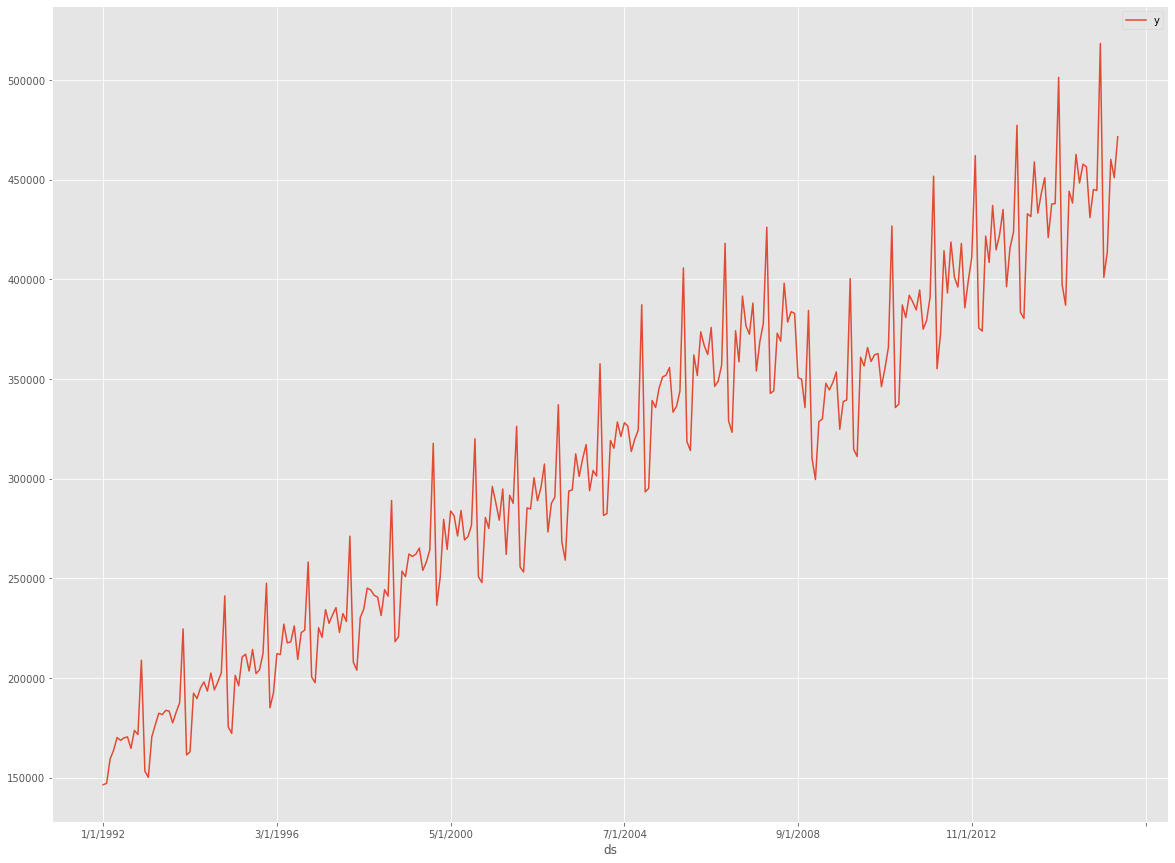

In [23]:
plt.rcParams['figure.figsize']=(20,15)
plt.style.use('ggplot')
ax=df.plot()
plt.show()


In [17]:
#Moving average method 

df.rolling(window=2).mean()

,y
ds,
1/1/1992,NaN
2/1/1992,146727.5
3/1/1992,153207.5
4/1/1992,161502.5
5/1/1992,166868.5
...,...
1/1/2016,459590.5
2/1/2016,407241.0
3/1/2016,436823.5


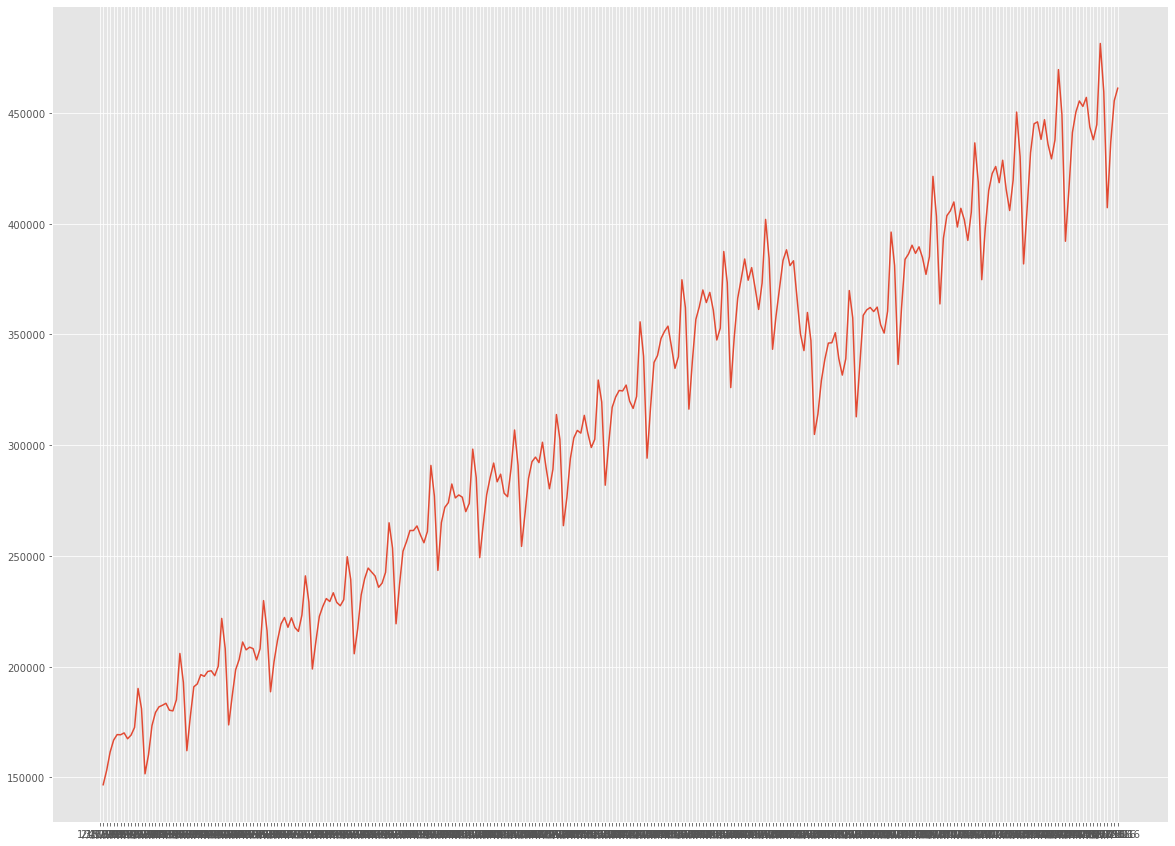

In [24]:
plt.plot(df.rolling(window=2).mean())

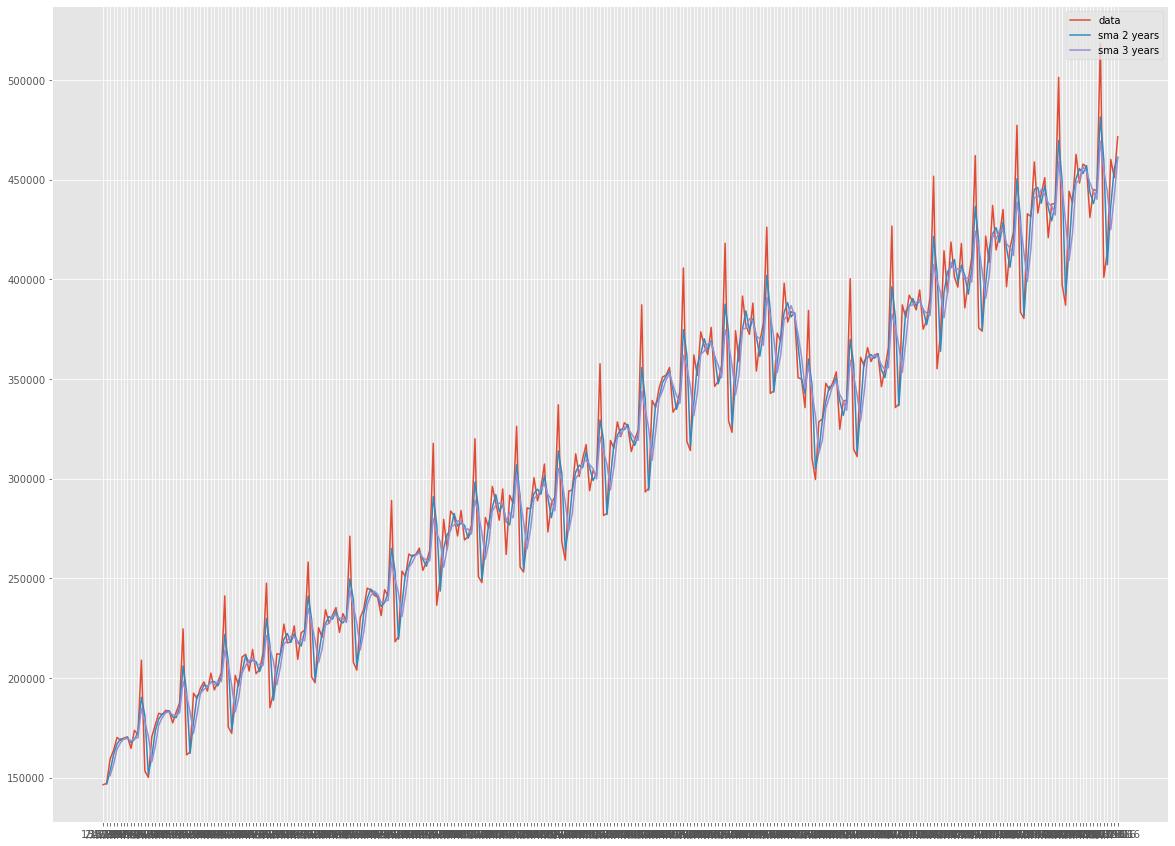

In [25]:
plt.plot(df,label='data')
plt.plot(df.rolling(window=2).mean(),label='sma 2 years')
plt.plot(df.rolling(window=3).mean(),label='sma 3 years')
plt.legend(loc=1)

## Exponential smoothing models
## simple exponential smoothing with alpha = 0.20

In [29]:
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing,Holt
fit1=SimpleExpSmoothing(df).fit(smoothing_level=0.2,optimized=False)

D:\phone\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\phone\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [31]:
fit1.fittedvalues

ds
1/1/1992    146376.000000
2/1/1992    146376.000000
3/1/1992    146516.600000
4/1/1992    149080.480000
5/1/1992    151998.184000
                ...      
1/1/2016    458657.093176
2/1/2016    447111.274541
3/1/2016    440399.819633
4/1/2016    444338.455706
5/1/2016    445657.764565
Length: 293, dtype: float64

In [32]:
fit1.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 146376.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2,False
initial_level,l.0,146376.0,False


In [34]:
#Model selection creteria -AIC,AICc, BIC

fit1.aic,fit1.aicc,fit1.bic

(5918.451162437205, 5918.590051326094, 5925.811507655239)

In [43]:
#Forecasting for next three months

forcast1=fit1.forecast(2)

In [44]:
forcast1


2016-06-01    450810.411652
2016-07-01    450810.411652
Freq: MS, dtype: float64

In [48]:
pd.DataFrame(forcast1,columns=['value'])

,value
2016-06-01,450810.411652
2016-07-01,450810.411652


In [49]:
df.tail()

,y
ds,
1/1/2016,400928
2/1/2016,413554
3/1/2016,460093
4/1/2016,450935
5/1/2016,471421
